# Exploration of GSE131907 Lung Cancer Single-Cell RNA-seq Data

This notebook explores the raw data from the GSE131907 dataset containing single-cell RNA sequencing data from lung cancer samples.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display options
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load Cell Annotation Data

In [4]:
# Load cell annotation data
cell_annotations = pd.read_csv('../data/raw/GSE131907_Lung_Cancer_cell_annotation.txt', sep='\t')
print(f"Cell annotation shape: {cell_annotations.shape}")
cell_annotations.head(10)

Cell annotation shape: (208506, 7)


,Index,Barcode,Sample,Sample_Origin,Cell_type,Cell_type.refined,Cell_subtype
0,AAACCTGCAAGGTGTG_LUNG_N01,AAACCTGCAAGGTGTG,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
1,AACTCCCGTTCACCTC_LUNG_N01,AACTCCCGTTCACCTC,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
2,AACTCCCTCACGCGGT_LUNG_N01,AACTCCCTCACGCGGT,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
3,AAGGAGCGTGTGCGTC_LUNG_N01,AAGGAGCGTGTGCGTC,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
4,AAGGTTCAGGTACTCT_LUNG_N01,AAGGTTCAGGTACTCT,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
5,ACACCAAAGTGTACGG_LUNG_N01,ACACCAAAGTGTACGG,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
6,ACACTGAAGTACTTGC_LUNG_N01,ACACTGAAGTACTTGC,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
7,ACGCCGACACGCGAAA_LUNG_N01,ACGCCGACACGCGAAA,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
8,ACGGAGAGTTGAGGTG_LUNG_N01,ACGGAGAGTTGAGGTG,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac
9,ACTGAACTCCTCAATT_LUNG_N01,ACTGAACTCCTCAATT,LUNG_N01,nLung,Myeloid cells,Myeloid cells,mo-Mac


In [14]:
# Basic info about the annotation data
cell_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208506 entries, 0 to 208505
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Index              208506 non-null  object
 1   Barcode            208506 non-null  object
 2   Sample             208506 non-null  object
 3   Sample_Origin      208506 non-null  object
 4   Cell_type          208506 non-null  object
 5   Cell_type.refined  180069 non-null  object
 6   Cell_subtype       178441 non-null  object
dtypes: object(7)
memory usage: 11.1+ MB


## 2. Explore Sample Origins

In [15]:
# Unique sample origins
print("Unique Sample Origins:")
print(cell_annotations['Sample_Origin'].unique())
print(f"\nNumber of unique origins: {cell_annotations['Sample_Origin'].nunique()}")

Unique Sample Origins:
['nLung' 'tLung' 'tL/B' 'nLN' 'mLN' 'PE' 'mBrain']

Number of unique origins: 7


Cells per Sample Origin:
Sample_Origin
tLung     45149
nLung     42995
nLN       37446
mBrain    29060
mLN       21479
PE        20304
tL/B      12073
Name: count, dtype: int64


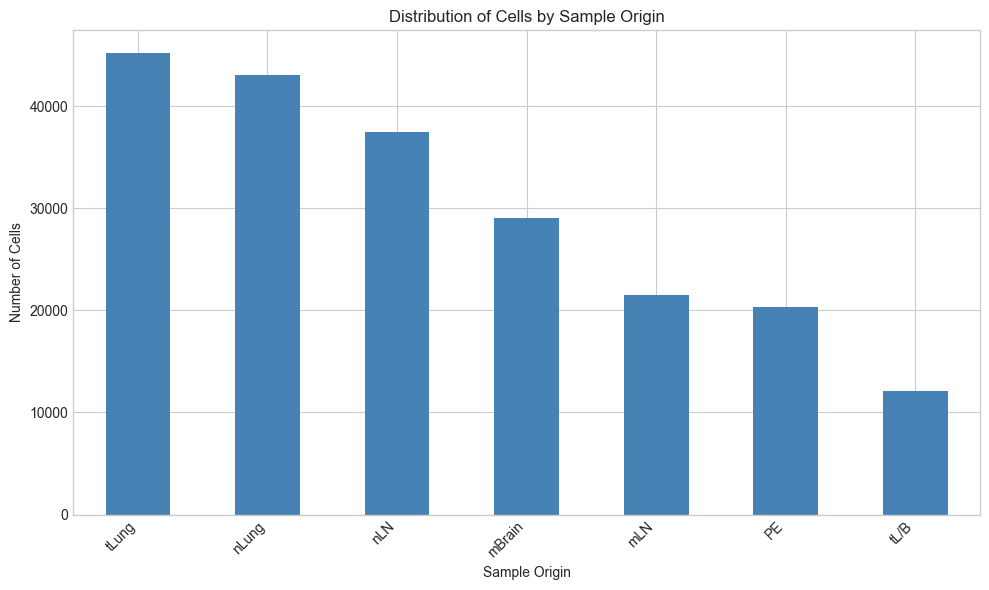

In [16]:
# Distribution of cells by sample origin
origin_counts = cell_annotations['Sample_Origin'].value_counts()
print("Cells per Sample Origin:")
print(origin_counts)

fig, ax = plt.subplots(figsize=(10, 6))
origin_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Sample Origin')
ax.set_ylabel('Number of Cells')
ax.set_title('Distribution of Cells by Sample Origin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Explore Cell Types

In [8]:
# Major cell types
print("Major Cell Types:")
print(cell_annotations['Cell_type'].unique())
print(f"\nNumber of major cell types: {cell_annotations['Cell_type'].nunique()}")

Major Cell Types:
['Myeloid cells' 'T lymphocytes' 'NK cells' 'B lymphocytes' 'Fibroblasts'
 'Endothelial cells' 'MAST cells' 'Epithelial cells' 'Undetermined'
 'Oligodendrocytes']

Number of major cell types: 10


Cells per Cell Type:
Cell_type
T lymphocytes        79676
Myeloid cells        42245
Epithelial cells     36467
B lymphocytes        27657
NK cells             11551
Fibroblasts           4172
MAST cells            3396
Endothelial cells     1996
Oligodendrocytes       716
Undetermined           630
Name: count, dtype: int64


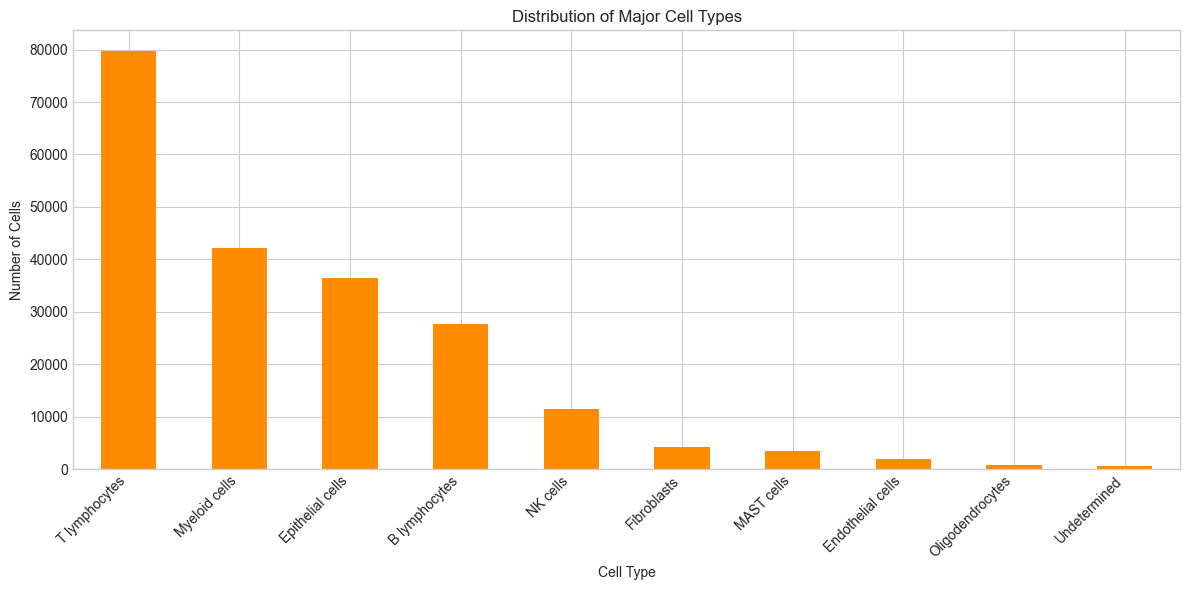

In [9]:
# Distribution of major cell types
celltype_counts = cell_annotations['Cell_type'].value_counts()
print("Cells per Cell Type:")
print(celltype_counts)

fig, ax = plt.subplots(figsize=(12, 6))
celltype_counts.plot(kind='bar', ax=ax, color='darkorange')
ax.set_xlabel('Cell Type')
ax.set_ylabel('Number of Cells')
ax.set_title('Distribution of Major Cell Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Cell subtypes
print("Cell Subtypes:")
print(cell_annotations['Cell_subtype'].unique())
print(f"\nNumber of cell subtypes: {cell_annotations['Cell_subtype'].nunique()}")

Cell Subtypes:
['mo-Mac' 'Monocytes' 'Alveolar Mac' 'Pleural Mac' 'CD1c+ DCs'
 'CD141+ DCs' 'pDCs' 'CD163+CD14+ DCs' 'Activated DCs' 'Cytotoxic CD8+ T'
 'Exhausted CD8+ T' 'Naive CD8+ T' 'CD8 low T' 'Naive CD4+ T' 'Treg'
 'CD4+ Th' 'NK' 'GrB-secreting B cells' 'MALT B cells'
 'Follicular B cells' 'COL13A1+ matrix FBs' 'Smooth muscle cells'
 'Tip-like ECs' 'Stalk-like ECs' 'Lymphatic ECs' 'MAST' 'AT1' 'AT2'
 'Ciliated' 'Club' 'Undetermined' nan 'Plasma cells' 'COL14A1+ matrix FBs'
 'Mesothelial cells' 'Exhausted Tfh' 'Pericytes' 'Tumor ECs' 'EPCs'
 'Myofibroblasts' 'CD8+/CD4+ Mixed Th' 'CD207+CD1a+ LCs'
 'GC B cells in the DZ' 'FB-like cells' 'tS1' 'tS2' 'tS3'
 'GC B cells in the LZ' 'Malignant cells' 'Microglia/Mac']

Number of cell subtypes: 49


Top 20 Cell Subtypes:
Cell_subtype
Malignant cells       24784
Naive CD4+ T          22527
Follicular B cells    22089
mo-Mac                13788
Alveolar Mac          13761
CD4+ Th                8945
NK                     7748
Undetermined           5457
Treg                   5166
CD8 low T              4926
Monocytes              4311
Exhausted CD8+ T       3798
MAST                   3396
Naive CD8+ T           3374
Cytotoxic CD8+ T       3363
tS1                    3270
tS2                    3018
Pleural Mac            2979
CD8+/CD4+ Mixed Th     2568
MALT B cells           2420
Name: count, dtype: int64


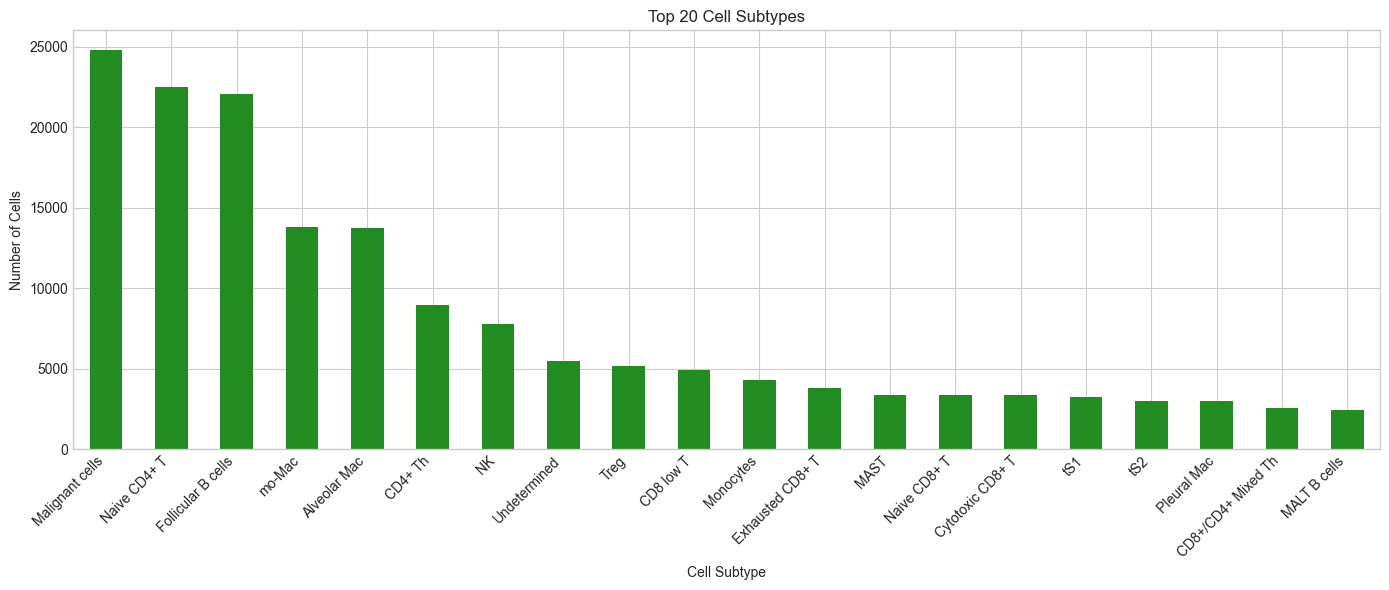

In [18]:
# Distribution of cell subtypes (top 20)
subtype_counts = cell_annotations['Cell_subtype'].value_counts()
print("Top 20 Cell Subtypes:")
print(subtype_counts.head(20))

fig, ax = plt.subplots(figsize=(14, 6))
subtype_counts.head(20).plot(kind='bar', ax=ax, color='forestgreen')
ax.set_xlabel('Cell Subtype')
ax.set_ylabel('Number of Cells')
ax.set_title('Top 20 Cell Subtypes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Cross-tabulation: Cell Types by Sample Origin

In [19]:
# Cross-tabulation of cell types by sample origin
crosstab = pd.crosstab(cell_annotations['Cell_type'], cell_annotations['Sample_Origin'])
print("Cell Types by Sample Origin:")
crosstab

Cell Types by Sample Origin:


Sample_Origin,PE,mBrain,mLN,nLN,nLung,tL/B,tLung
Cell_type,,,,,,,
B lymphocytes,3285,1311,6062,10584,634,469,5312
Endothelial cells,0,0,0,0,1341,0,655
Epithelial cells,396,15463,3053,0,3703,6582,7270
Fibroblasts,0,636,37,0,1670,111,1718
MAST cells,0,508,0,0,1079,0,1809
Myeloid cells,3063,5657,5442,1288,16672,1329,8794
NK cells,1297,859,984,0,6824,583,1004
Oligodendrocytes,0,716,0,0,0,0,0
T lymphocytes,11974,3910,5882,25319,11072,2932,18587


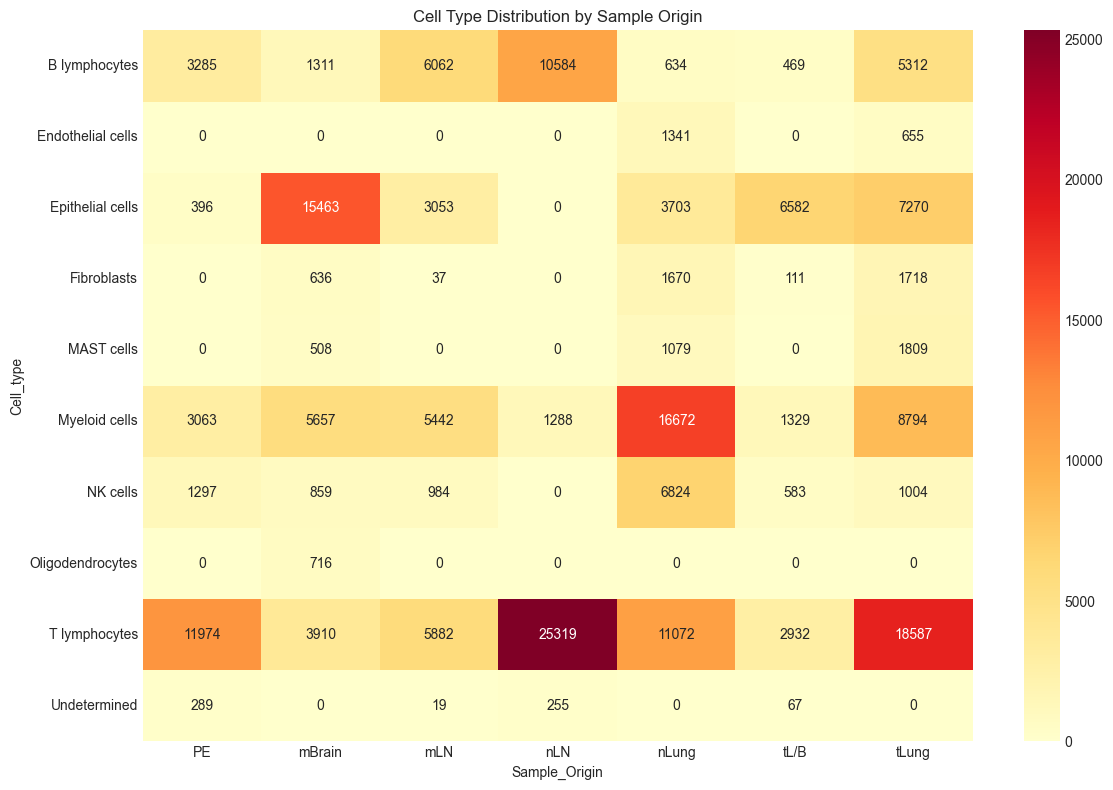

In [20]:
# Heatmap visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=ax)
ax.set_title('Cell Type Distribution by Sample Origin')
plt.tight_layout()
plt.show()

## 5. Sample Information

In [21]:
# Number of unique samples
print(f"Number of unique samples: {cell_annotations['Sample'].nunique()}")
print(f"\nSample names:")
print(cell_annotations['Sample'].unique())

Number of unique samples: 58

Sample names:
['LUNG_N01' 'LUNG_N06' 'LUNG_N08' 'LUNG_N09' 'LUNG_N18' 'LUNG_N19'
 'LUNG_N20' 'LUNG_N28' 'LUNG_N30' 'LUNG_N31' 'LUNG_N34' 'LUNG_T06'
 'LUNG_T08' 'LUNG_T09' 'LUNG_T18' 'LUNG_T19' 'LUNG_T20' 'LUNG_T25'
 'LUNG_T28' 'LUNG_T30' 'LUNG_T31' 'LUNG_T34' 'BRONCHO_58' 'EBUS_06'
 'EBUS_28' 'EBUS_49' 'LN_01' 'LN_02' 'LN_03' 'LN_04' 'LN_05' 'LN_06'
 'LN_07' 'LN_08' 'LN_11' 'LN_12' 'BRONCHO_11' 'EBUS_10' 'EBUS_12'
 'EBUS_13' 'EBUS_15' 'EBUS_19' 'EBUS_51' 'EFFUSION_06' 'EFFUSION_11'
 'EFFUSION_12' 'EFFUSION_13' 'EFFUSION_64' 'NS_02' 'NS_03' 'NS_04' 'NS_06'
 'NS_07' 'NS_12' 'NS_13' 'NS_16' 'NS_17' 'NS_19']



Cells per sample (summary stats):
count      58.000000
mean     3594.931034
std      1129.072634
min      1070.000000
25%      2995.750000
50%      3488.000000
75%      4370.750000
max      5798.000000
Name: count, dtype: float64


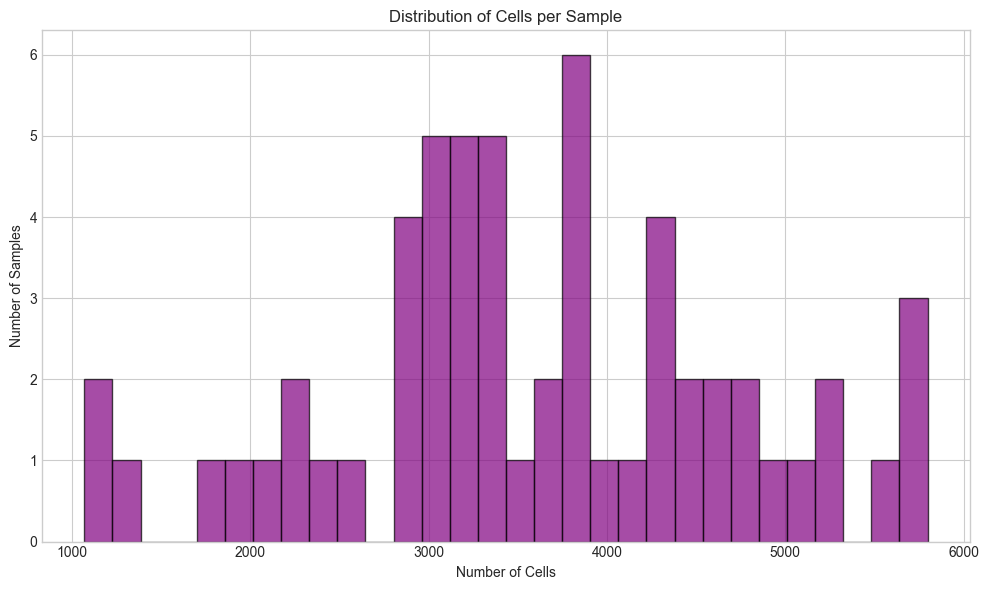

In [22]:
# Cells per sample
sample_counts = cell_annotations['Sample'].value_counts()
print(f"\nCells per sample (summary stats):")
print(sample_counts.describe())

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(sample_counts.values, bins=30, color='purple', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Cells')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Cells per Sample')
plt.tight_layout()
plt.show()

## 6. Preview UMI Matrix (Gene Expression)

In [23]:
# Load a small portion of the UMI matrix to understand its structure
# Note: Full matrix is large (29,635 genes x 208,506 cells)
umi_preview = pd.read_csv('../data/raw/GSE131907_Lung_Cancer_raw_UMI_matrix.txt', 
                          sep='\t', nrows=100, index_col=0)
print(f"UMI matrix preview shape: {umi_preview.shape}")
print(f"\nFirst few genes (rows):")
print(umi_preview.index[:20].tolist())
print(f"\nFirst few cells (columns):")
print(umi_preview.columns[:10].tolist())

UMI matrix preview shape: (100, 208506)

First few genes (rows):
['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A2ML1-AS2', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC', 'AADACL2', 'AADACL2-AS1', 'AADACL3', 'AADACL4', 'AADAT', 'AAED1', 'AAGAB']

First few cells (columns):
['AAACCTGAGAAACCGC_LN_05', 'AAACCTGAGAAACGCC_NS_13', 'AAACCTGAGAAGGTGA_LUNG_N18', 'AAACCTGAGACAAAGG_LUNG_N18', 'AAACCTGAGACATAAC_LN_04', 'AAACCTGAGACCTTTG_LUNG_N30', 'AAACCTGAGACGACGT_LUNG_T09', 'AAACCTGAGACGACGT_LUNG_T34', 'AAACCTGAGACGCTTT_LUNG_T18', 'AAACCTGAGACGCTTT_NS_04']


In [25]:
# Preview of expression values
umi_preview.iloc[:20, :20]

,AAACCTGAGAAACCGC_LN_05,AAACCTGAGAAACGCC_NS_13,AAACCTGAGAAGGTGA_LUNG_N18,AAACCTGAGACAAAGG_LUNG_N18,AAACCTGAGACATAAC_LN_04,AAACCTGAGACCTTTG_LUNG_N30,AAACCTGAGACGACGT_LUNG_T09,AAACCTGAGACGACGT_LUNG_T34,AAACCTGAGACGCTTT_LUNG_T18,AAACCTGAGACGCTTT_NS_04,AAACCTGAGACTGGGT_LUNG_N30,AAACCTGAGACTGTAA_LUNG_T34,AAACCTGAGAGCAATT_EFFUSION_06,AAACCTGAGAGCAATT_LUNG_N31,AAACCTGAGAGCCTAG_LUNG_N20,AAACCTGAGAGGGATA_LUNG_N08,AAACCTGAGAGGGATA_NS_19,AAACCTGAGAGGTTGC_BRONCHO_11,AAACCTGAGAGTGACC_BRONCHO_58,AAACCTGAGAGTGACC_EFFUSION_06
Index,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2ML1-AS2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0


In [26]:
# Basic stats on the preview
print("Expression value statistics (preview):")
print(f"Min: {umi_preview.values.min()}")
print(f"Max: {umi_preview.values.max()}")
print(f"Mean: {umi_preview.values.mean():.4f}")
print(f"Sparsity: {(umi_preview.values == 0).sum() / umi_preview.size * 100:.2f}%")

Expression value statistics (preview):
Min: 0
Max: 333
Mean: 0.0676
Sparsity: 95.43%


## 7. Summary Statistics

In [27]:
# Summary of the dataset
print("=" * 50)
print("GSE131907 Lung Cancer Dataset Summary")
print("=" * 50)
print(f"Total cells: {len(cell_annotations):,}")
print(f"Total genes: ~29,634")
print(f"Number of samples: {cell_annotations['Sample'].nunique()}")
print(f"Sample origins: {cell_annotations['Sample_Origin'].nunique()}")
print(f"Major cell types: {cell_annotations['Cell_type'].nunique()}")
print(f"Cell subtypes: {cell_annotations['Cell_subtype'].nunique()}")
print("=" * 50)

GSE131907 Lung Cancer Dataset Summary
Total cells: 208,506
Total genes: ~29,634
Number of samples: 58
Sample origins: 7
Major cell types: 10
Cell subtypes: 49


## 8. Patient-Level Analysis

Patients can be identified by extracting the numeric suffix from sample names. Some patients have matched tumor/normal samples which are particularly valuable for CNV inference.

In [31]:
# Analyze sample naming patterns
# Samples are from different collection types - they should NOT be merged by number alone
# LUNG_T/N = primary lung tumor/normal pairs
# LN = lymph node samples  
# EBUS = endobronchial ultrasound samples
# BRONCHO = bronchoscopy samples
# EFFUSION = pleural effusion samples
# NS = brain metastasis (neurosurgery) samples

# First, let's understand the sample structure
print("Sample naming patterns:")
print("=" * 60)

samples = cell_annotations['Sample'].unique()
sample_types = {}
for s in sorted(samples):
    prefix = s.rsplit('_', 1)[0]  # Get prefix before last underscore
    num = s.rsplit('_', 1)[1]     # Get number after last underscore
    if prefix not in sample_types:
        sample_types[prefix] = []
    sample_types[prefix].append(num)

for prefix, nums in sorted(sample_types.items()):
    print(f"  {prefix}: {sorted(nums)}")

print(f"\nTotal samples: {len(samples)}")

Sample naming patterns:
  BRONCHO: ['11', '58']
  EBUS: ['06', '10', '12', '13', '15', '19', '28', '49', '51']
  EFFUSION: ['06', '11', '12', '13', '64']
  LN: ['01', '02', '03', '04', '05', '06', '07', '08', '11', '12']
  LUNG: ['N01', 'N06', 'N08', 'N09', 'N18', 'N19', 'N20', 'N28', 'N30', 'N31', 'N34', 'T06', 'T08', 'T09', 'T18', 'T19', 'T20', 'T25', 'T28', 'T30', 'T31', 'T34']
  NS: ['02', '03', '04', '06', '07', '12', '13', '16', '17', '19']

Total samples: 58


In [32]:
# Identify matched tumor/normal pairs from LUNG samples
# LUNG_T## and LUNG_N## with same number are matched pairs from the same patient

lung_tumor_samples = [s for s in samples if s.startswith('LUNG_T')]
lung_normal_samples = [s for s in samples if s.startswith('LUNG_N')]

# Extract patient numbers
tumor_nums = {s.replace('LUNG_T', '') for s in lung_tumor_samples}
normal_nums = {s.replace('LUNG_N', '') for s in lung_normal_samples}

# Patients with matched T/N pairs
matched_nums = tumor_nums & normal_nums
tumor_only_nums = tumor_nums - normal_nums
normal_only_nums = normal_nums - tumor_nums

print("LUNG Sample Analysis (Primary tumor/normal pairs)")
print("=" * 60)
print(f"\nPatients with MATCHED tumor + normal: {len(matched_nums)}")
print(f"  Patient IDs: {sorted(matched_nums)}")

print(f"\nPatients with tumor ONLY: {len(tumor_only_nums)}")
print(f"  Patient IDs: {sorted(tumor_only_nums)}")

print(f"\nPatients with normal ONLY: {len(normal_only_nums)}")
print(f"  Patient IDs: {sorted(normal_only_nums)}")

# Create patient mapping for LUNG samples
def get_lung_patient_id(sample):
    """Extract patient ID only for LUNG samples."""
    if sample.startswith('LUNG_T') or sample.startswith('LUNG_N'):
        num = sample.split('_')[1][1:]  # Get number after T or N
        return f"LUNG_P{num.zfill(2)}"
    return None

cell_annotations['Lung_Patient_ID'] = cell_annotations['Sample'].apply(get_lung_patient_id)

LUNG Sample Analysis (Primary tumor/normal pairs)

Patients with MATCHED tumor + normal: 10
  Patient IDs: ['06', '08', '09', '18', '19', '20', '28', '30', '31', '34']

Patients with tumor ONLY: 1
  Patient IDs: ['25']

Patients with normal ONLY: 1
  Patient IDs: ['01']


In [35]:
# Build summary table for patients with matched tumor/normal LUNG samples
matched_patient_summary = []

for num in sorted(matched_nums):
    tumor_sample = f'LUNG_T{num}'
    normal_sample = f'LUNG_N{num}'
    patient_id = f'P{num.zfill(4)}'
    
    tumor_data = cell_annotations[cell_annotations['Sample'] == tumor_sample]
    normal_data = cell_annotations[cell_annotations['Sample'] == normal_sample]
    
    matched_patient_summary.append({
        'Patient_ID': patient_id,
        'Tumor_Sample': tumor_sample,
        'Normal_Sample': normal_sample,
        'Tumor_Cells': len(tumor_data),
        'Normal_Cells': len(normal_data),
        'Total_Cells': len(tumor_data) + len(normal_data),
    })

matched_df = pd.DataFrame(matched_patient_summary)

print("=" * 70)
print("PATIENTS WITH MATCHED TUMOR/NORMAL LUNG SAMPLES")
print("(Suitable for inferCNV - using normal lung as reference)")
print("=" * 70)
print(f"\nTotal matched patients: {len(matched_df)}\n")

matched_df

PATIENTS WITH MATCHED TUMOR/NORMAL LUNG SAMPLES
(Suitable for inferCNV - using normal lung as reference)

Total matched patients: 10



,Patient_ID,Tumor_Sample,Normal_Sample,Tumor_Cells,Normal_Cells,Total_Cells
0,P0006,LUNG_T06,LUNG_N06,3426,2839,6265
1,P0008,LUNG_T08,LUNG_N08,3765,3380,7145
2,P0009,LUNG_T09,LUNG_N09,3840,2528,6368
3,P0018,LUNG_T18,LUNG_N18,3705,4628,8333
4,P0019,LUNG_T19,LUNG_N19,4361,3870,8231
5,P0020,LUNG_T20,LUNG_N20,4021,5798,9819
6,P0028,LUNG_T28,LUNG_N28,4705,3411,8116
7,P0030,LUNG_T30,LUNG_N30,4094,3884,7978
8,P0031,LUNG_T31,LUNG_N31,5578,4241,9819
9,P0034,LUNG_T34,LUNG_N34,3280,5222,8502


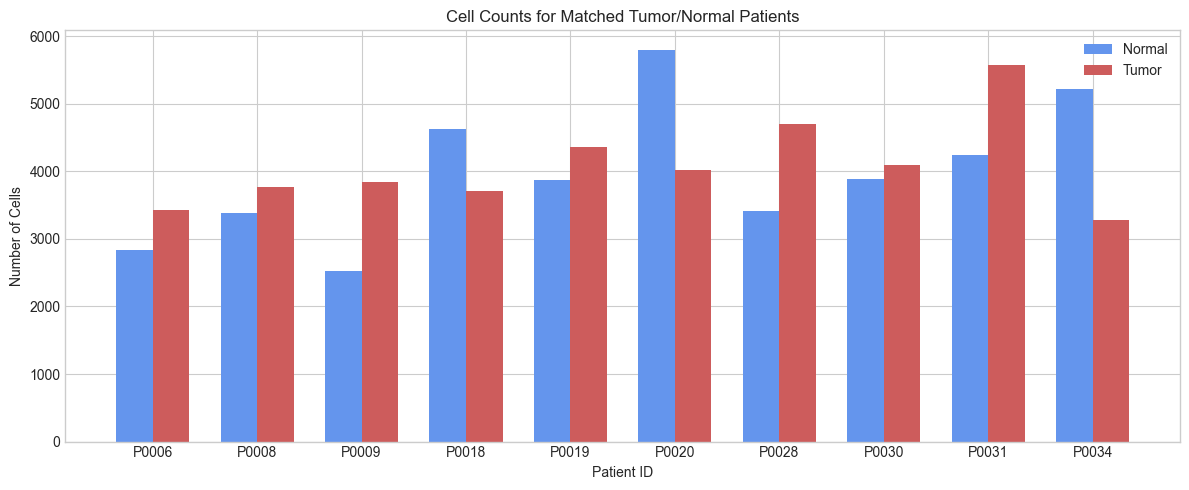

In [36]:
# Visualize cells per matched patient
fig, ax = plt.subplots(figsize=(12, 5))

x = range(len(matched_df))
width = 0.35

ax.bar([i - width/2 for i in x], matched_df['Normal_Cells'], width, label='Normal', color='cornflowerblue')
ax.bar([i + width/2 for i in x], matched_df['Tumor_Cells'], width, label='Tumor', color='indianred')

ax.set_xlabel('Patient ID')
ax.set_ylabel('Number of Cells')
ax.set_title('Cell Counts for Matched Tumor/Normal Patients')
ax.set_xticks(x)
ax.set_xticklabels(matched_df['Patient_ID'])
ax.legend()

plt.tight_layout()
plt.show()

In [37]:
# Detailed view of P0006 (proof of concept patient)
tumor_sample = 'LUNG_T06'
normal_sample = 'LUNG_N06'

p_data = cell_annotations[cell_annotations['Sample'].isin([tumor_sample, normal_sample])]

print("=" * 70)
print("DETAILED VIEW: Patient P0006")
print("=" * 70)

for sample in [tumor_sample, normal_sample]:
    sample_data = p_data[p_data['Sample'] == sample]
    origin = sample_data['Sample_Origin'].iloc[0]
    print(f"\n{sample} ({origin}): {len(sample_data):,} cells")
    print(sample_data['Cell_type'].value_counts().to_string())

DETAILED VIEW: Patient P0006

LUNG_T06 (tLung): 3,426 cells
Cell_type
T lymphocytes        1499
Myeloid cells         588
B lymphocytes         521
Fibroblasts           485
Epithelial cells      145
MAST cells             94
Endothelial cells      54
NK cells               40

LUNG_N06 (nLung): 2,839 cells
Cell_type
Myeloid cells        1310
T lymphocytes        1107
Epithelial cells      178
NK cells              166
MAST cells             30
B lymphocytes          29
Fibroblasts            10
Endothelial cells       9
